In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(reshape2)
    library(ggpubr)
    library(matrixStats)
})

In [3]:
df = read.csv("all_samples_species.csv")

In [4]:
df[1:5,1:5]

taxa,V1V2_HNO17_S8_R1,V1V2_HNO19_S9_R1,V1V2_HNO209_S14_R1,V1V2_HNO223_S15_R1
Actinomyces graevenitzii F0530,1,1,1,1
Aerococcus urinaeequi,0,0,0,0
Alistipes obesi,0,0,0,1
Ambiguous_taxa,49,34,23,17
Anaerococcus sp. SJ-2013,0,0,0,0


In [5]:
df2_mat = as.matrix( df[-1])
rownames(df2_mat) = df$taxa

In [6]:
# sets
primer_sets = unique( sapply(strsplit(colnames(df2_mat),'_'),'[[',1) )
primer_sets

[1] "V1V2" "V2V3" "V3V4" "V4V5" "V5V7" "V7V9"

In [7]:
new_df = list();
for( i in 1:length(primer_sets) ){
    primer= primer_sets[i]
    print(primer)
    new_df[[primer]] = rowMeans(df2_mat[ , grep( primer, colnames(df2_mat))])
    }

[1] "V1V2"
[1] "V2V3"
[1] "V3V4"
[1] "V4V5"
[1] "V5V7"
[1] "V7V9"


In [8]:
new_df = as.data.frame( new_df )

In [9]:
new_df %>% head

,V1V2,V2V3,V3V4,V4V5,V5V7,V7V9
Actinomyces graevenitzii F0530,0.826087,1.00000000,0.86956522,0.73913043,0.6956522,0.26086957
Aerococcus urinaeequi,0.000000,0.00000000,0.00000000,0.00000000,0.6956522,0.00000000
Alistipes obesi,0.173913,0.04347826,0.04347826,0.04347826,0.0000000,0.04347826
Ambiguous_taxa,33.130435,28.08695652,21.73913043,27.47826087,22.0000000,21.91304348
Anaerococcus sp. SJ-2013,0.000000,0.00000000,0.00000000,0.04347826,0.0000000,0.00000000
Bacteroides thetaiotaomicron,0.000000,0.00000000,0.00000000,0.04347826,0.0000000,0.04347826


In [10]:
length( unique((rownames(new_df[ new_df$V1V2 !=0,]["V1V2"]))) )

[1] 64

In [11]:
length( unique((rownames(new_df[ new_df$V2V3 !=0,]["V1V2"]))) )

[1] 54

In [12]:
length( unique((rownames(new_df[ new_df$V4V5 !=0,]["V1V2"]))) )

[1] 54

In [13]:
length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V1V2"]))) )

[1] 40

In [14]:
length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V1V2"]))) )

[1] 40

In [15]:
v1v2 = length( unique((rownames(new_df[ new_df$V1V2 !=0,]["V1V2"]))) )
v2v3 = length( unique((rownames(new_df[ new_df$V2V3 !=0,]["V2V3"]))) )
v3v4 = length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V3V4"]))) )
v4v5 = length( unique((rownames(new_df[ new_df$V4V5 !=0,]["V4V5"]))) )
v5v7 = length( unique((rownames(new_df[ new_df$V5V7 !=0,]["V5V7"]))) )
v7v9 = length( unique((rownames(new_df[ new_df$V5V7 !=0,]["V7V9"]))) )

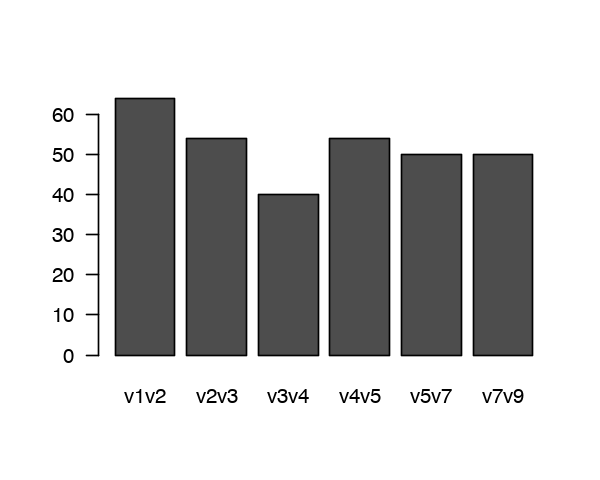

In [16]:
options(repr.plot.height=4, repr.plot.width=5)
barplot( cbind( v1v2, v2v3, v3v4, v4v5, v5v7, v7v9 ) , las=1)